In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from collections import Counter
from sklearn import preprocessing,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

# DATA CLEANING AND PREPROCESSING

In [2]:
df = pd.read_csv ('C:\Sally\Fall 21\BANA 212 - Programing\Final project\song_data.csv')
df2 = pd.read_csv ('C:\Sally\Fall 21\BANA 212 - Programing\Final project\song_info.csv')
df.head()
#df2.head()
#converting song_duration_ms to seconds by dividing by 1000
df["song_duration_ms"] = df["song_duration_ms"].div(1000)
df.head()
df.rename(columns = {'song_duration_ms':'song_duration_sec'}, inplace = True)
df.head()

song_name  song_popularity  song_duration_sec  \
0  Boulevard of Broken Dreams               73            262.333   
1                  In The End               66            216.933   
2           Seven Nation Army               76            231.733   
3                  By The Way               74            216.933   
4           How You Remind Me               56            223.826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [3]:
#Summary Statistics 
df.describe()

song_popularity  song_duration_sec  acousticness  danceability  \
count     18835.000000       18835.000000  18835.000000  18835.000000   
mean         52.991877         218.211588      0.258539      0.633348   
std          21.905654          59.887541      0.288719      0.156723   
min           0.000000          12.000000      0.000001      0.000000   
25%          40.000000         184.339500      0.024100      0.533000   
50%          56.000000         211.306000      0.132000      0.645000   
75%          69.000000         242.844000      0.424000      0.748000   
max         100.000000        1799.346000      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [4]:
#check for null 
pd.isnull(df).sum()

song_name            0
song_popularity      0
song_duration_sec    0
acousticness         0
danceability         0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
audio_mode           0
speechiness          0
tempo                0
time_signature       0
audio_valence        0
dtype: int64

Text(0.5, 1.0, 'Popularity Dist')

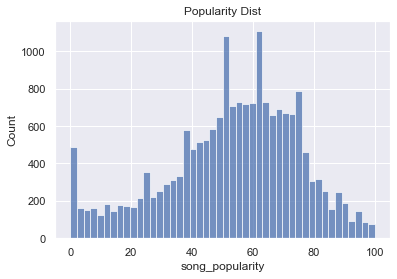

In [5]:
#Exploratory Data Analysis 
sns.histplot(df['song_popularity']).set_title('Popularity Dist')

Text(0.5, 1.0, 'Danceability Dist')

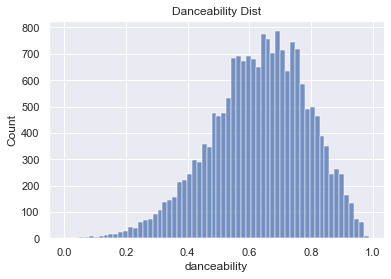

In [6]:
#Other Histogram plots 
sns.histplot(df['danceability']).set_title('Danceability Dist')

Text(0.5, 1.0, 'Song Duration Dist')

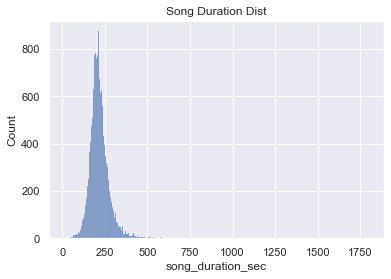

In [7]:
sns.histplot(df['song_duration_sec']).set_title('Song Duration Dist')

Text(0.5, 1.0, 'Song Energy Dist')

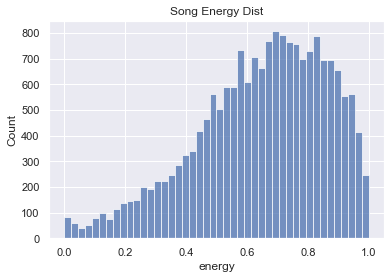

In [8]:
sns.histplot(df['energy']).set_title('Song Energy Dist')

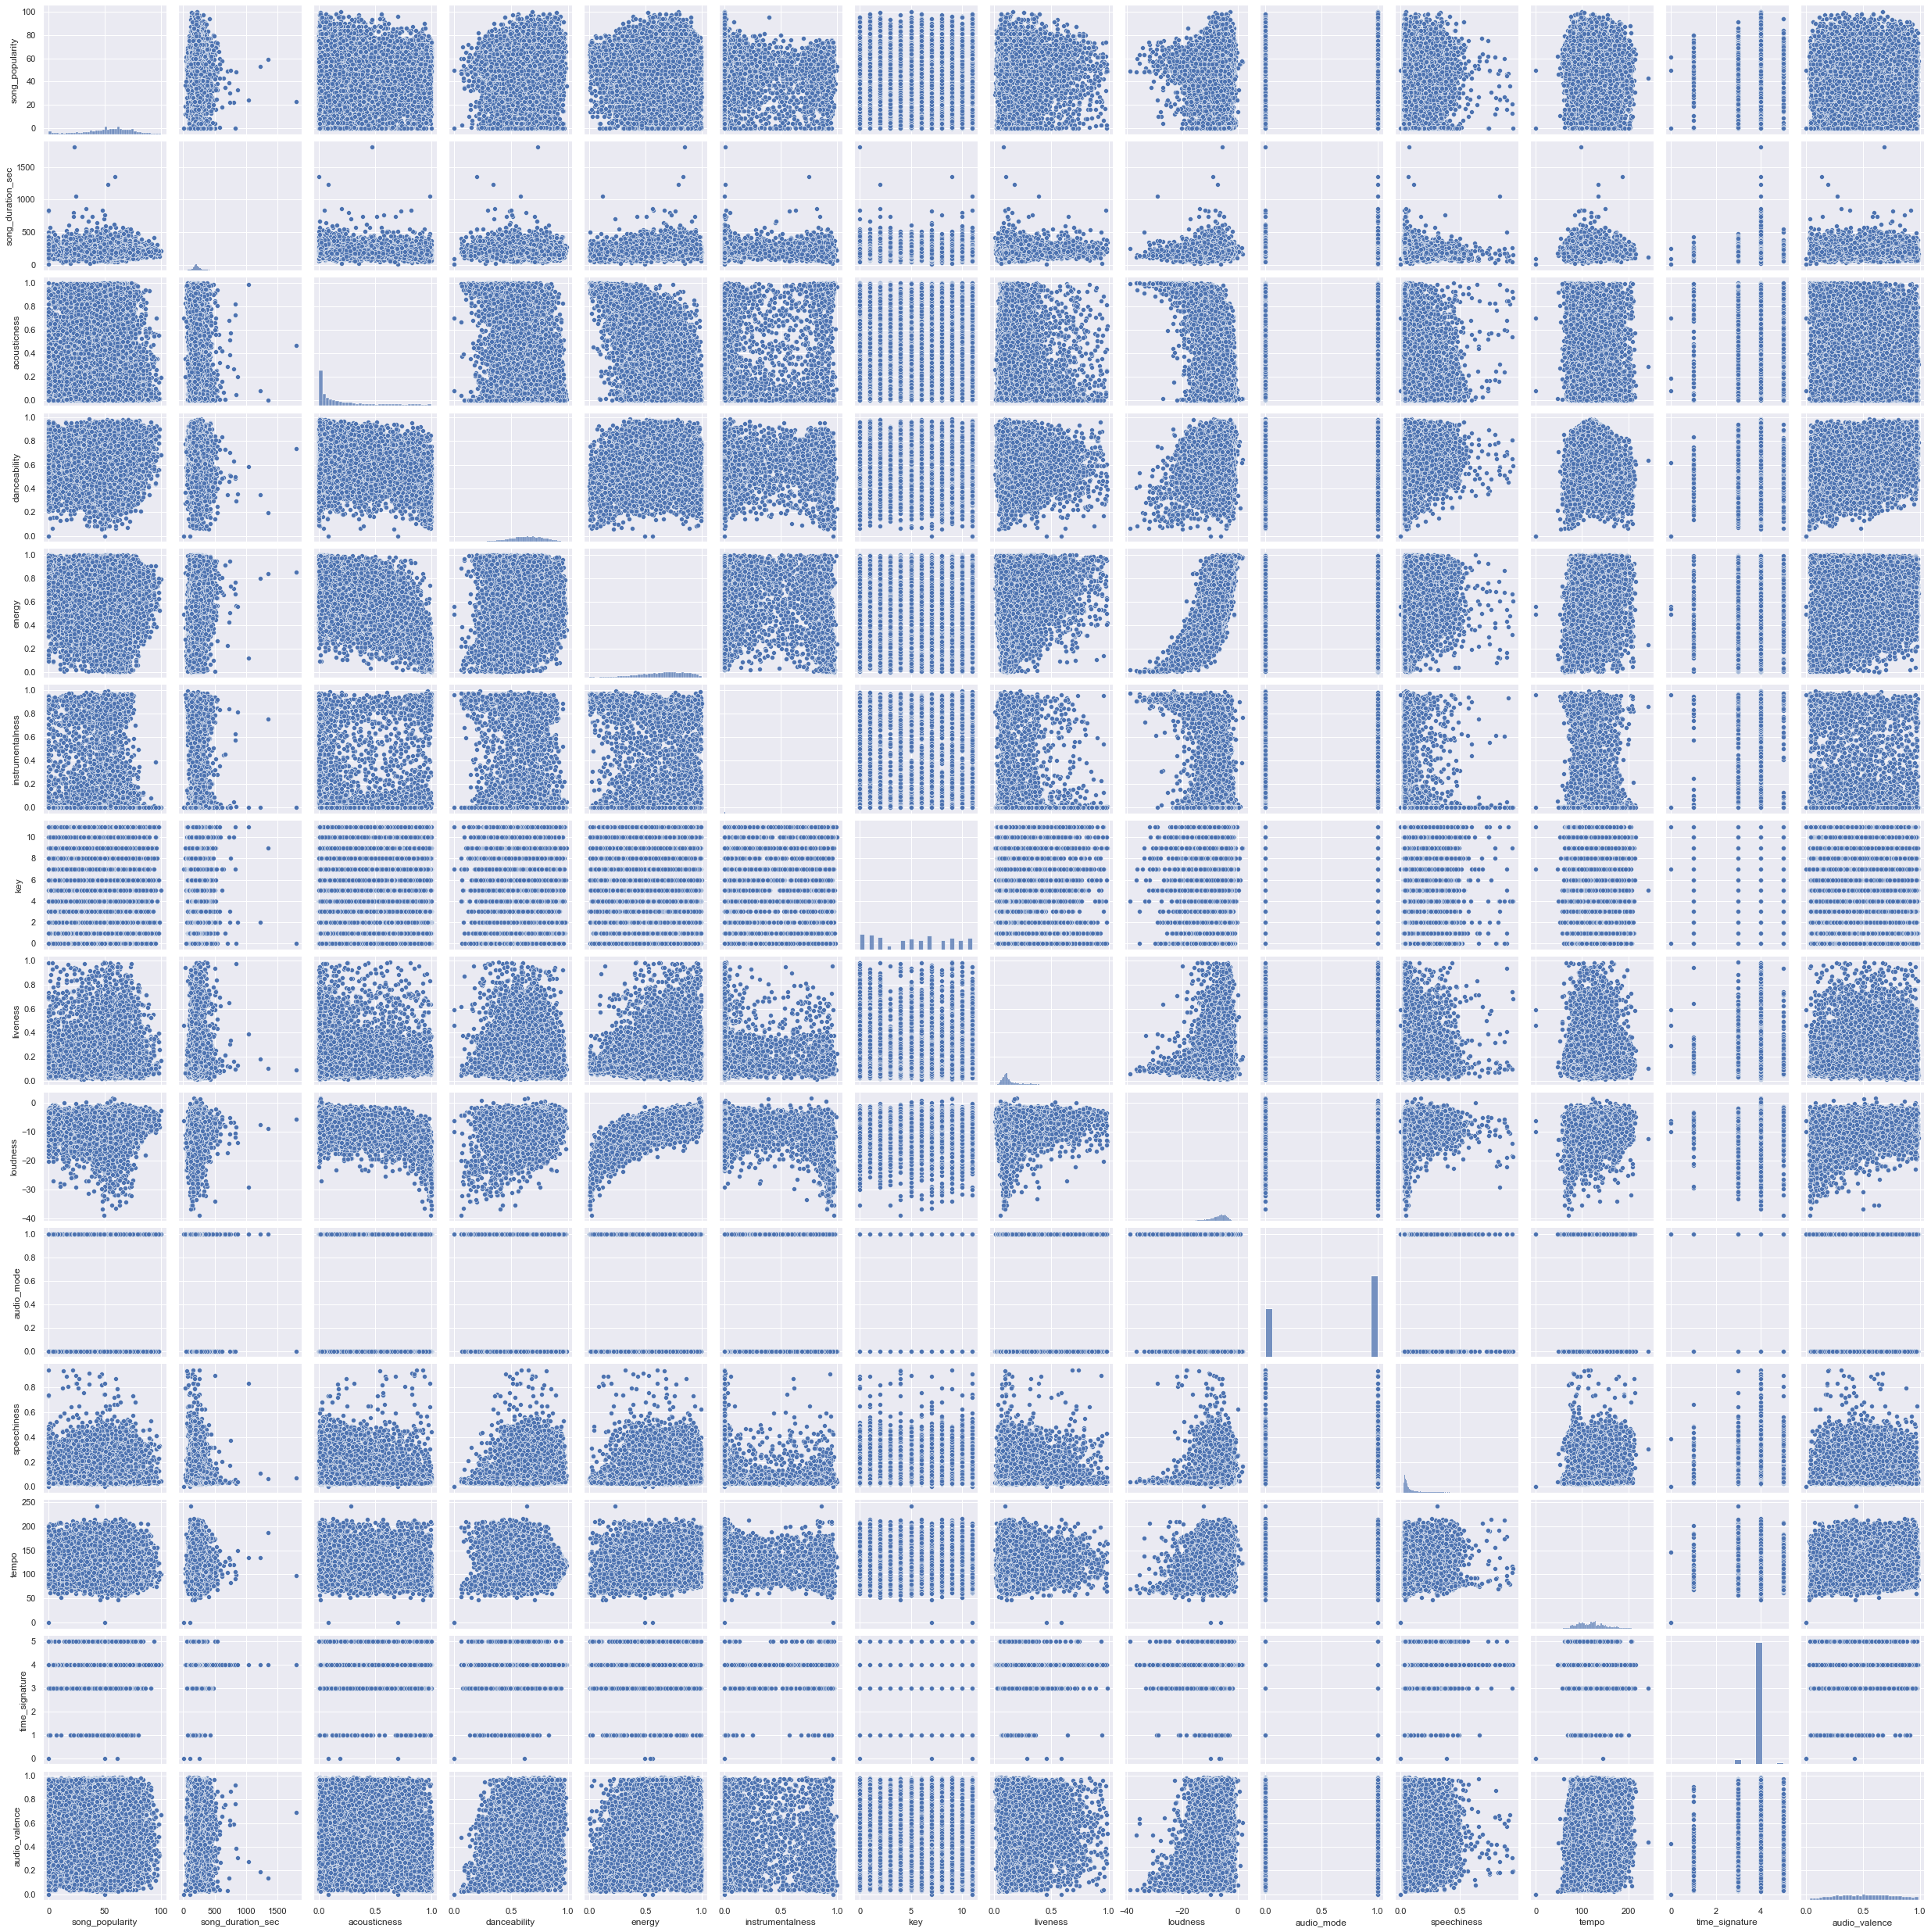

In [9]:
sns.pairplot(df)

In [10]:
#Create dataframe for all songs with popularity scores above 70
pop_df = df[df.song_popularity > 70]
pop_df

song_name  song_popularity  song_duration_sec  \
0      Boulevard of Broken Dreams               73            262.333   
2               Seven Nation Army               76            231.733   
3                      By The Way               74            216.933   
5                Bring Me To Life               80            235.893   
6                     Last Resort               81            199.893   
...                           ...              ...                ...   
18750         If We Were Vampires               72            215.563   
18752               Sense of Home               72            265.840   
18772            The Night We Met               79            208.226   
18774                       River               75            238.560   
18813        First Day Of My Life               72            188.800   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
5          0.008950         0.316   0.945          0.000002    4    0.3960   
6          0.000504         0.581   0.887          0.001110    4    0.2680   
...             ...           ...     ...               ...  ...       ...   
18750      0.824000         0.629   0.208          0.000004    5    0.1070   
18752      0.892000         0.565   0.207          0.000002    3    0.1020   
18772      0.968000         0.441   0.379          0.262000    2    0.6390   
18774      0.689000         0.658   0.179          0.000000    8    0.1700   
18813      0.915000         0.468   0.201          0.000083    4    0.0952   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
5        -3.169           0       0.1240  189.931               4   
6        -3.659           0       0.0624   90.578               4   
...         ...         ...          ...      ...             ...   
18750   -16.225           1       0.0324   96.609               4   
18752   -10.926           1       0.0320  140.068               4   
18772    -9.545           1       0.0449  174.118               3   
18774   -10.866           1       0.0448  128.128               4   
18813   -17.024           1       0.0388   94.422               4   

       audio_valence  
0             0.4740  
2             0.3240  
3             0.1980  
5             0.3200  
6             0.7240  
...              ...  
18750         0.6850  
18752         0.0904  
18772         0.1050  
18774         0.1910  
18813         0.3830  

[4100 rows x 15 columns]

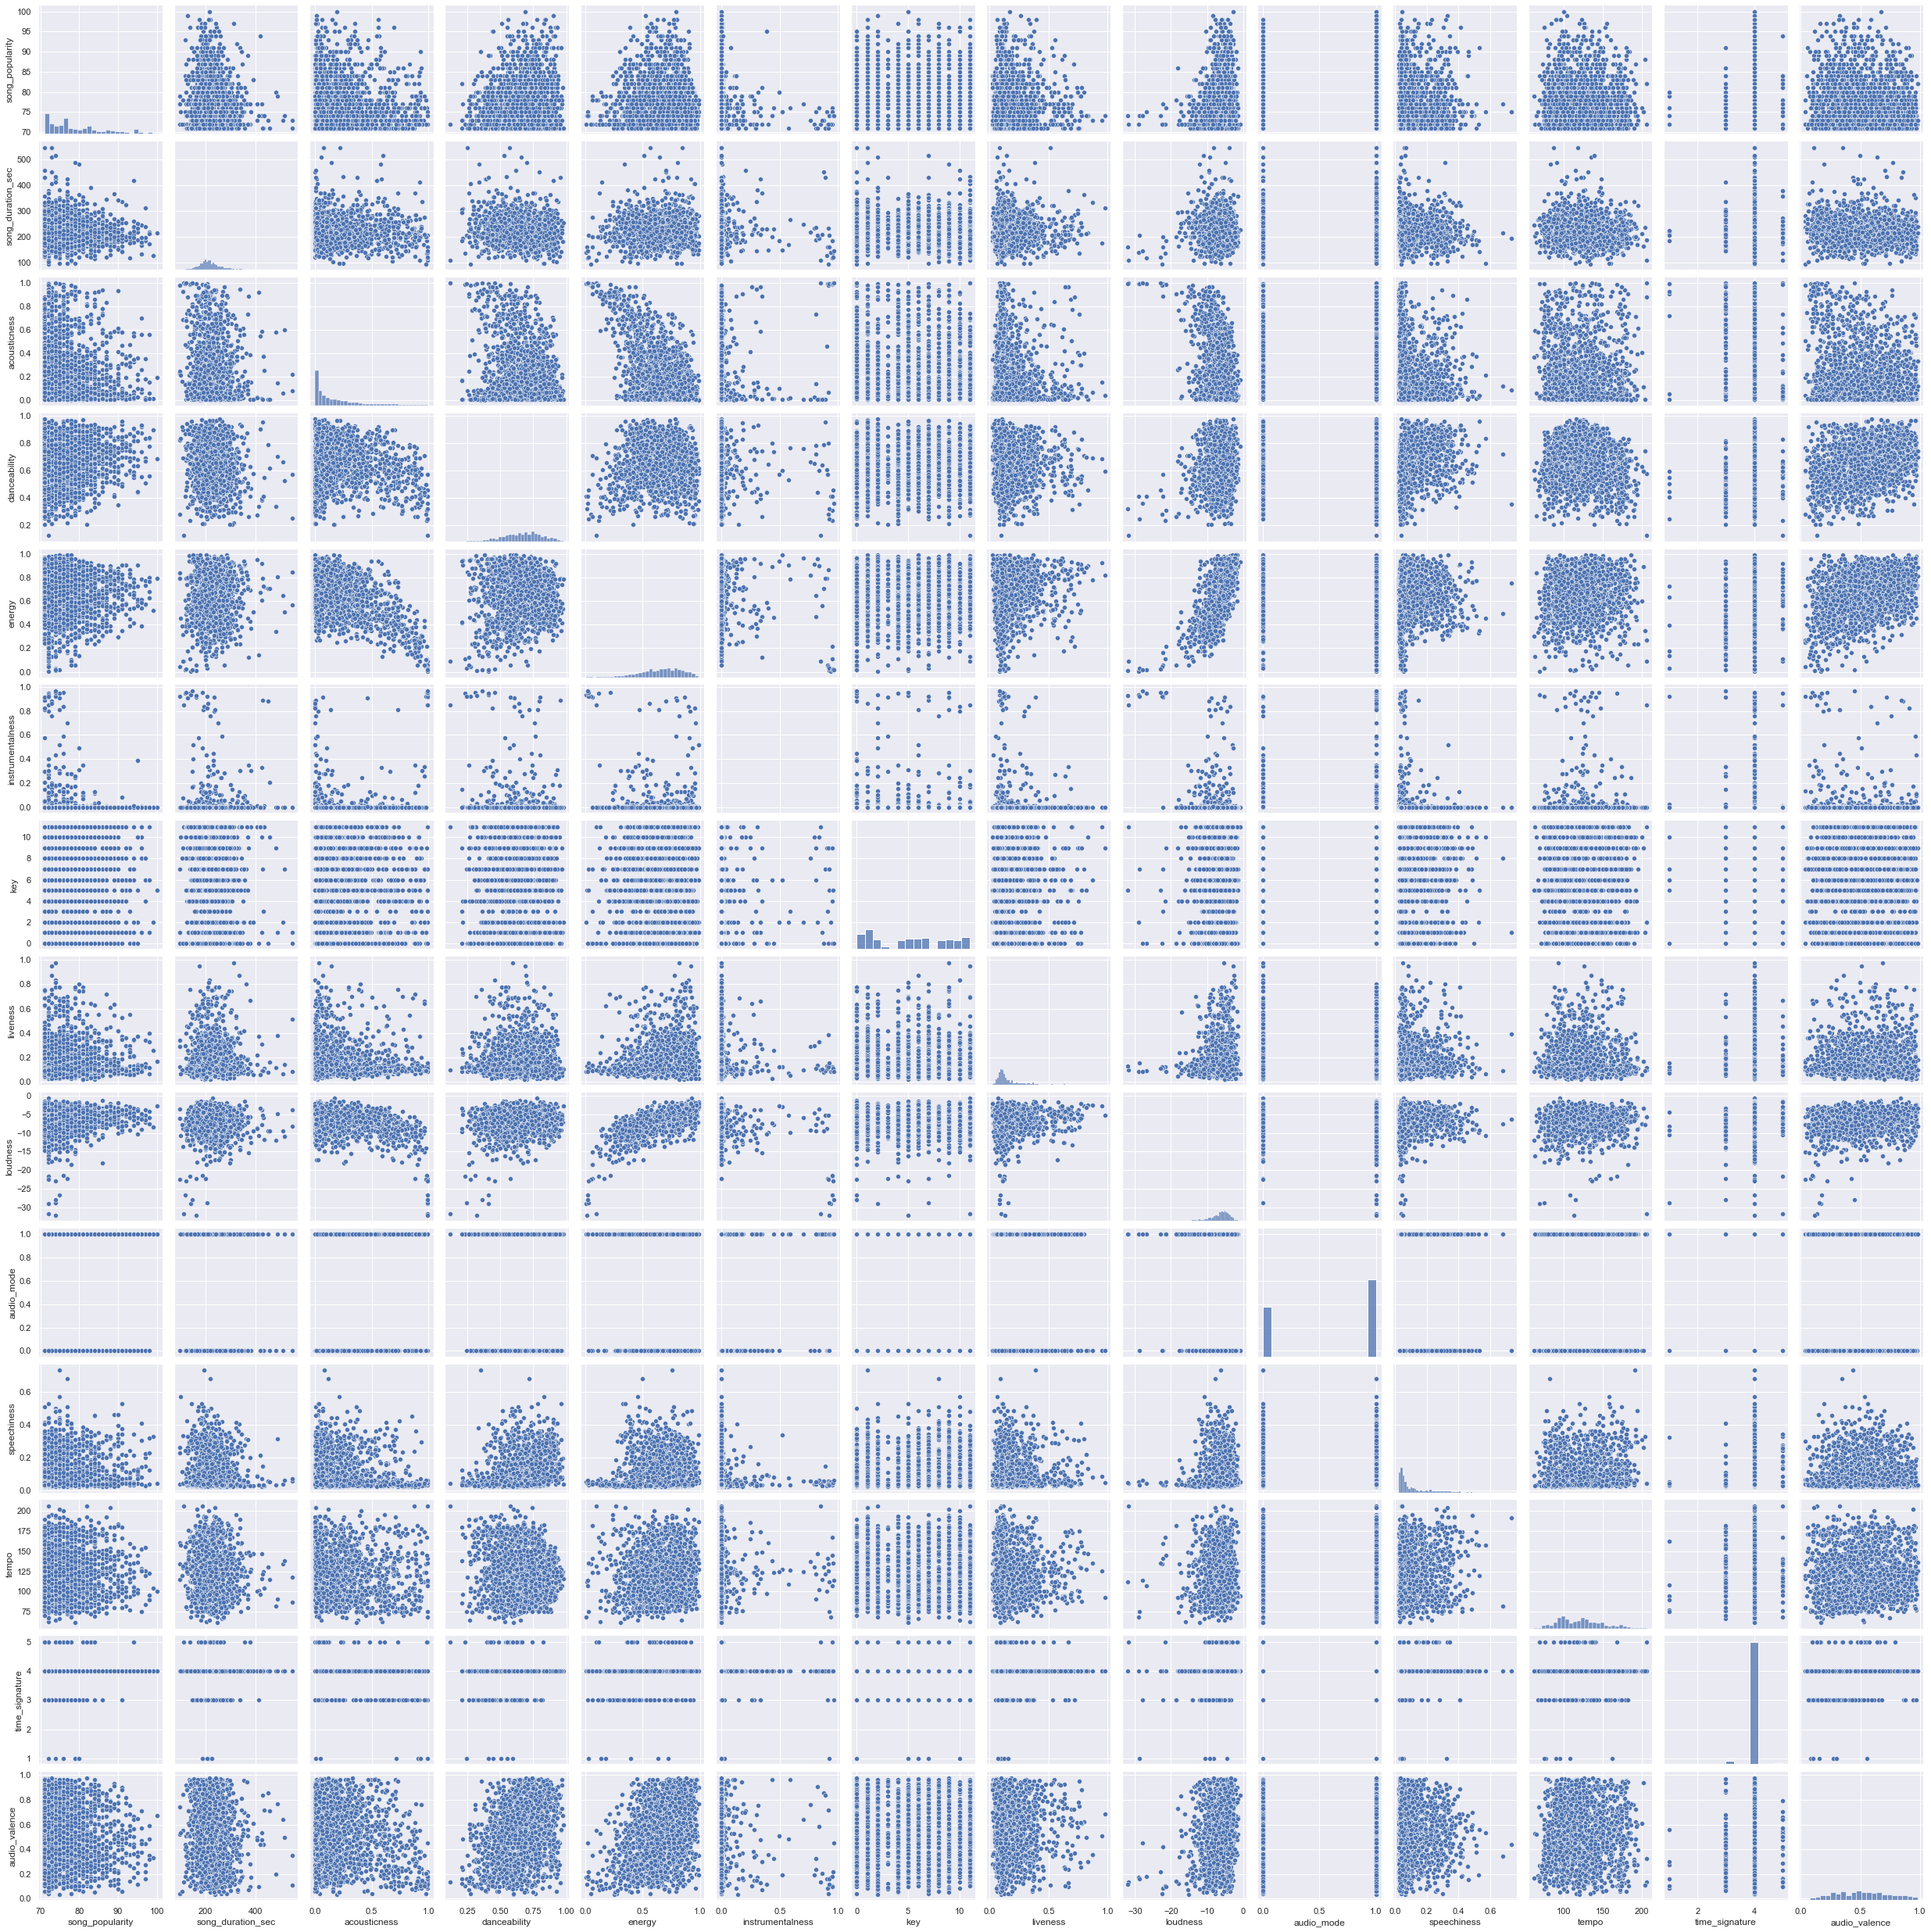

In [11]:
#Since we are interested in characteristics of songs rated over 80, we will look at a pairplot for insight
sns.pairplot(pop_df)

Text(0.5, 1.0, 'Popularity Based on Key')

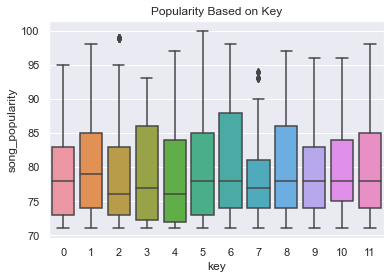

In [12]:
#A box plot of key distribution of popular songs > 80
sns.boxplot(x = 'key', y = 'song_popularity', data = pop_df)
plt.title('Popularity Based on Key')

<AxesSubplot:>

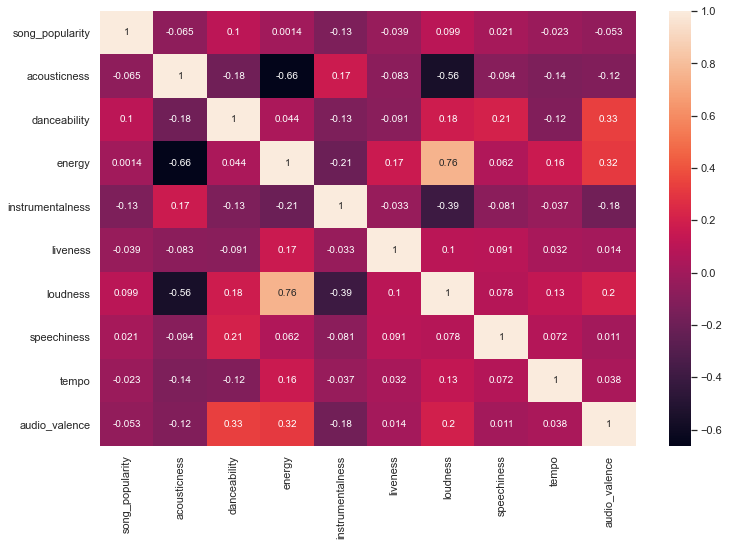

In [13]:
# A HeatMap of the songs rating > 70 on popularity rating.
corr = df[['song_popularity','acousticness','danceability','energy',
'instrumentalness','liveness','loudness','speechiness','tempo','audio_valence']].corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
#Energy ~ Loudness, energy - acousticness, loudness ~ acousticness
#song-popularity ~ danceability+instrumentalness

In [14]:
# Data cleaning to exclude outliners
def outliers_exclude(df,features):
    outlier_indices = []
    for c in features:
        Q1 = np.percentile(df[c],25)  # 1st quartile
        Q3 = np.percentile(df[c],75)  # 3rd quartile
        IQR = Q3 - Q1
        outlier_list_col = df[(df[c] < Q1 - IQR * 1.5) | (df[c] > Q3 + IQR * 1.5)].index  # detect outlier and their indeces
        outlier_indices.extend(outlier_list_col) # Extends the outliners list by adding all items of outlier_list_col to the end of original outliner_indices.   
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(index for index, count in outlier_indices.items() if count > 2) #only exclude the rows that have more than 2 outliners when going
    return multiple_outliers

#exclude the outliers
df_clean = df.drop(outliers_exclude(df,["song_popularity","song_duration_sec","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]), axis = 0).reset_index(drop= True)
df_clean.describe()

song_popularity  song_duration_sec  acousticness  danceability  \
count     18510.000000       18510.000000  18510.000000  18510.000000   
mean         53.066451         218.031752      0.249714      0.636757   
std          21.978573          57.031042      0.279963      0.153051   
min           0.000000          26.186000      0.000001      0.061700   
25%          40.000000         184.829500      0.023400      0.537000   
50%          56.000000         211.450000      0.128000      0.646000   
75%          69.000000         242.569750      0.408000      0.749000   
max         100.000000        1799.346000      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18510.000000      18510.000000  18510.000000  18510.000000   
mean       0.652128          0.066954      5.288115      0.178721   
std        0.205634          0.201879      3.616036      0.141743   
min        0.015500          0.000000      0.000000      0.010900   
25%        0.517000          0.000000      2.000000      0.092800   
50%        0.678000          0.000010      5.000000      0.122000   
75%        0.816750          0.001870      8.000000      0.221000   
max        0.999000          0.989000     11.000000      0.984000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18510.000000  18510.000000  18510.000000  18510.000000    18510.000000   
mean      -7.230794      0.628471      0.101555    121.397331        3.961967   
std        3.327913      0.483226      0.102366     28.450005        0.286119   
min      -29.673000      0.000000      0.022400     46.591000        0.000000   
25%       -8.894000      0.000000      0.037700     99.017000        4.000000   
50%       -6.508000      1.000000      0.055700    120.032000        4.000000   
75%       -4.885000      1.000000      0.120000    139.943000        4.000000   
max        1.585000      1.000000      0.936000    242.318000        5.000000   

       audio_valence  
count   18510.000000  
mean        0.532328  
std         0.242268  
min         0.023000  
25%         0.341000  
50%         0.531000  
75%         0.728000  
max         0.984000

In [15]:
#Create new df with popularity as a binary column
df_binary = df_clean
df_binary.loc[(df_binary.song_popularity < 70), ('song_popularity')] = 0 
df_binary.loc[(df_binary.song_popularity >= 70), ('song_popularity')] = 1
df_binary.loc[df_binary['song_popularity'] == 1] # to check if the binary comes out correct

song_name  song_popularity  song_duration_sec  \
0      Boulevard of Broken Dreams                1            262.333   
2               Seven Nation Army                1            231.733   
3                      By The Way                1            216.933   
5                Bring Me To Life                1            235.893   
6                     Last Resort                1            199.893   
...                           ...              ...                ...   
18427               Sense of Home                1            265.840   
18428                Recording 15                1            242.000   
18447            The Night We Met                1            208.226   
18449                       River                1            238.560   
18488        First Day Of My Life                1            188.800   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
5          0.008950         0.316   0.945          0.000002    4    0.3960   
6          0.000504         0.581   0.887          0.001110    4    0.2680   
...             ...           ...     ...               ...  ...       ...   
18427      0.892000         0.565   0.207          0.000002    3    0.1020   
18428      0.956000         0.552   0.126          0.015300   11    0.1090   
18447      0.968000         0.441   0.379          0.262000    2    0.6390   
18449      0.689000         0.658   0.179          0.000000    8    0.1700   
18488      0.915000         0.468   0.201          0.000083    4    0.0952   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
5        -3.169           0       0.1240  189.931               4   
6        -3.659           0       0.0624   90.578               4   
...         ...         ...          ...      ...             ...   
18427   -10.926           1       0.0320  140.068               4   
18428   -18.014           1       0.0306   92.441               4   
18447    -9.545           1       0.0449  174.118               3   
18449   -10.866           1       0.0448  128.128               4   
18488   -17.024           1       0.0388   94.422               4   

       audio_valence  
0             0.4740  
2             0.3240  
3             0.1980  
5             0.3200  
6             0.7240  
...              ...  
18427         0.0904  
18428         0.4390  
18447         0.1050  
18449         0.1910  
18488         0.3830  

[4435 rows x 15 columns]

In [16]:
#Before running the 2 models we will normalize each columns
df_binary_prenor = df_binary.drop(['song_name'], axis = 1)
scaler = preprocessing.MaxAbsScaler()
scaler.fit(df_binary_prenor)
scaled = scaler.transform(df_binary_prenor)
df_binary_normalize = pd.DataFrame(scaled, columns=df_binary_prenor.columns)
df_binary_normalize

song_popularity  song_duration_sec  acousticness  danceability  \
0                  1.0           0.145794      0.005542      0.502533   
1                  0.0           0.120562      0.010341      0.549139   
2                  1.0           0.128787      0.008203      0.746707   
3                  1.0           0.120562      0.026506      0.456940   
4                  0.0           0.124393      0.000958      0.452888   
...                ...                ...           ...           ...   
18505              0.0           0.088724      0.896586      0.506586   
18506              0.0           0.114300      0.768072      0.501520   
18507              0.0           0.101265      0.850402      0.728470   
18508              0.0           0.195782      0.948795      0.494428   
18509              0.0           0.107557      0.914659      0.648430   

         energy  instrumentalness       key  liveness  loudness  audio_mode  \
0      0.682683          0.000030  0.727273  0.059858 -0.138004         1.0   
1      0.853854          0.000000  0.272727  0.109756 -0.215920         0.0   
2      0.463463          0.451972  0.000000  0.259146 -0.263809         1.0   
3      0.970971          0.003589  0.000000  0.103659 -0.166414         1.0   
4      0.766767          0.000000  0.909091  0.114837 -0.170694         1.0   
...         ...               ...       ...       ...       ...         ...   
18505  0.151151          0.000066  1.000000  0.112805 -0.542817         1.0   
18506  0.161161          0.000001  1.000000  0.106707 -0.474438         0.0   
18507  0.325325          0.000000  0.000000  0.127033 -0.411890         1.0   
18508  0.326326          0.015875  0.272727  0.120935 -0.405082         1.0   
18509  0.381381          0.000257  0.363636  0.105691 -0.397331         1.0   

       speechiness     tempo  time_signature  audio_valence  
0         0.031410  0.689425             0.8       0.481707  
1         0.053205  0.434371             0.8       0.376016  
2         0.084615  0.511233             0.8       0.329268  
3         0.114316  0.505303             0.8       0.201220  
4         0.033440  0.709856             0.8       0.583333  
...            ...       ...             ...            ...  
18505     0.037179  0.470328             0.8       0.304878  
18506     0.032158  0.389100             0.8       0.269309  
18507     0.037927  0.538689             0.8       0.290650  
18508     0.035043  0.437702             0.8       0.328252  
18509     0.032265  0.377562             0.8       0.590447  

[18510 rows x 14 columns]

In [17]:
# Spliting the normilized df_binary as train and test
x = df_binary_normalize.drop(['song_popularity'], axis = 1)
y = df_binary_normalize['song_popularity']

# Splitting training and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=480)

# KNN MODEL

In [18]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) test accuracy is: ', accuracy_score(y_test, prediction))

With KNN (K=1) test accuracy is:  0.8462992976769314


Maximum accuracy: 0.8462992976769314 at K = 1


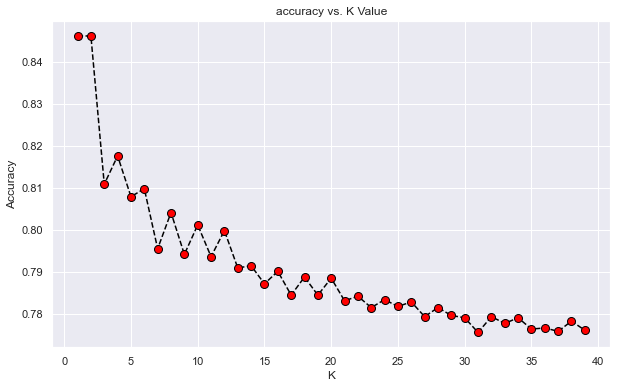

In [19]:
# Plot accuracy with K value
acc = []
# Will take some time
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'black',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=8)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:",max(acc),"at K =", acc.index(max(acc))+1)

# RANDOM FOREST CLASSIFIER

In [20]:
# Random Forest Classifier
RFC_Model = RandomForestClassifier(n_estimators = 100)
RFC_Model.fit(x_train,y_train)
RFC_Predict = RFC_Model.predict(x_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 0.9181523500810372


In [21]:
# Confusion matrix
print(confusion_matrix(y_test,RFC_Predict))
print(classification_report(y_test,RFC_Predict))
print(accuracy_score(y_test, RFC_Predict))

[[2810   44]
 [ 259  589]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2854
         1.0       0.93      0.69      0.80       848

    accuracy                           0.92      3702
   macro avg       0.92      0.84      0.87      3702
weighted avg       0.92      0.92      0.91      3702

0.9181523500810372


No handles with labels found to put in legend.


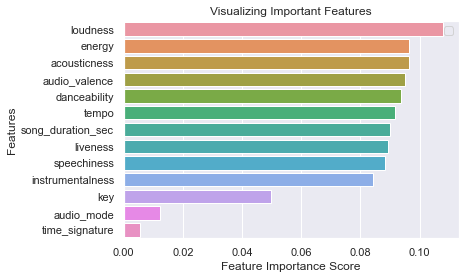

In [22]:
# Feature important scores
feature_imp = pd.Series(RFC_Model.feature_importances_,index=df_binary_normalize.drop(['song_popularity'], axis = 1).columns).sort_values(ascending=False)
feature_imp
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# SVM

In [23]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

Train accuracy of svm algo: 0.757766072393301
Test accuracy of svm algo: 0.7709346299297677


In [24]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.75827144 0.75759622 0.75759622 0.75759622 0.75759622 0.75759622
 0.75759622 0.75759622 0.75810811 0.75810811]
Cross_val scores average:  0.7577661185831343


In [45]:
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],'SVM__gamma':[0.1, 0.01]}

In [ ]:
cv = GridSearchCV(pipeline,param_grid=parameters,cv=10)
cv.fit(x_train,y_train)
y_pred = cv.predict(x_test)
print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Test accuracy: {}".format(cv.score(x_test, y_test)))

# LOGISTIC REGRESSION

In [31]:
LR_Model = LogisticRegression()
LR_Model.fit(x_train, y_train)
LR_Predict = LR_Model.predict(x_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Model Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_test, LR_Predict) 
print("Model AUC: " + str(LR_AUC))

Model Accuracy: 0.7668827660723933
Model AUC: 0.4990298290383573


In [34]:
result = sm.Logit(y_test, x_test).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.498688
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        song_popularity   No. Observations:                 3702
Model:                          Logit   Df Residuals:                     3689
Method:                           MLE   Df Model:                           12
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                 0.07332
Time:                        22:35:26   Log-Likelihood:                -1846.1
converged:                       True   LL-Null:                       -1992.2
Covariance Type:            nonrobust   LLR p-value:                 2.096e-55
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
song_duration_sec     3.8537      1.320      2.919      0.004       1.266       6.441
acoustic

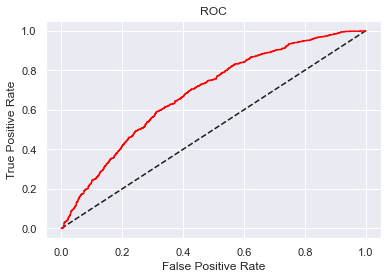

In [35]:
y_pred_prob = LR_Model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [36]:
y_pred=LR_Model.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[2835   19]
 [ 844    4]]


Text(0.5, 12.5, 'Predicted label')

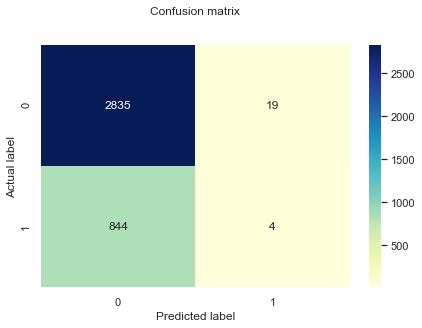

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2'], 'solver' : ['newton-cg', 'lbfgs', 'liblinear']}# l1 lasso l2 ridge
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,scoring='accuracy', cv=10)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

C:\Users\thuyd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\thuyd\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\thuyd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\thuyd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\thuyd\anaconda3\lib\site-packages\sklearn\model_selectio

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.7577661185831343


C:\Users\thuyd\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.75776612 0.75776612 0.75776612 0.75776612
        nan        nan 0.75776612 0.75776612 0.75776612 0.75776612
        nan        nan 0.75756346 0.75763103 0.75763103 0.75756351
        nan        nan 0.75702315 0.75702324 0.75702324 0.75702324
        nan        nan 0.75655045 0.7565504  0.75648288 0.75661797
        nan        nan 0.75648288 0.75648288 0.75648288 0.75648288
        nan        nan 0.75648288 0.75648288 0.75648288 0.75648288]
  warnings.warn(


In [40]:
New_model=LogisticRegression(C=0.001, penalty="l1", solver = "liblinear")
New_model.fit(x_train,y_train)
print("New_Accuracy: ",New_model.score(x_test,y_test))

New_Accuracy:  0.7709346299297677
